Here's our mini spam classification dataset! Each message is labeled as spam (1) or not spam (0). We'll use this to build a simple logistic regression classifier.

Next, we'll:

Turn these messages into numerical features using keyword-based encoding.

Train a logistic regression model.

Visualize and test predictions.


✅ What we’re doing now:
We’re going to use a simple Bag-of-Words style approach by checking for the presence of specific spammy keywords in each message. For this small example, it keeps things visual and intuitive.

🛠️ Let's define the keywords and transform the messages:
Here’s the next code block for your notebook:

**First make sure you connect your google drive and add the playground map to the google drive and have pasted all the resources in it**


In [14]:
import os

# List contents of the playground directory
os.listdir('/content/drive/MyDrive/playground')

['generated_spam_dataset.csv']

In [12]:
import pandas as pd

# Set the path to your CSV file in Google Drive
file_path = "/content/drive/MyDrive/playground/generated_spam_dataset.csv"
df = pd.read_csv(file_path)
df.head()

# Define a small list of spammy keywords
keywords = ["free", "win", "urgent", "money", "call", "claim", "now", "click", "buy", "prize"]

# Create features for each keyword
for keyword in keywords:
    df[keyword] = df["message"].str.lower().str.contains(keyword).astype(int)

# Show the new feature columns
df_features = df[keywords + ["label"]]
df_features.head()


,free,win,urgent,money,call,claim,now,click,buy,prize,label
0,0,1,0,0,0,0,1,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,1,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1


What you’ve done so far:

✅ Loaded your dataset from Google Drive using pandas.

✅ Defined spammy keywords you suspect are common in spam messages.

✅ Created features that check whether each message contains those keywords (with 1 for present, 0 for not).

✅ Built a simplified feature matrix for each message + its spam label.

Your dataset now looks like a nice binary feature table — perfect for training a simple classifier like Logistic Regression! 🧠

🚀 Next Steps: Visual + Classifier
Visualize word presence vs. spam probability (optional but insightful).

Train a Logistic Regression model on these features.

Evaluate performance with accuracy, confusion matrix, and maybe ROC curve.


Time to make our mini spam detector smart! Here's the next step — training a logistic regression model to classify messages as spam or not based on your handcrafted keyword features.

🔍 What We're Doing Next:
We'll:

Split the data into training and test sets

Train a Logistic Regression model

Predict and evaluate the results



✅ Accuracy: 0.90

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.78      0.88         9

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



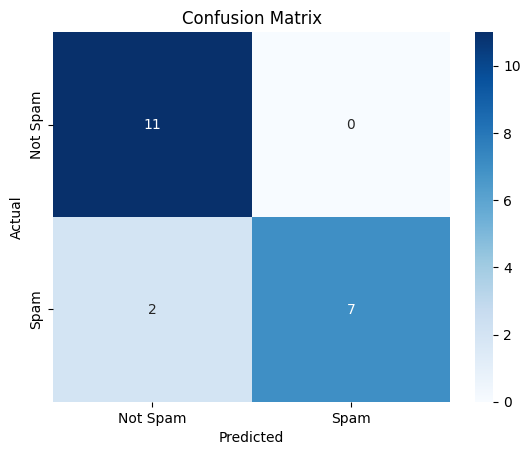

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Split features and labels
X = df_features[keywords]  # your binary keyword columns
y = df_features["label"]   # 1 = spam, 0 = not spam

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
